<a href="https://colab.research.google.com/github/ramoants254/regression-ml-project/blob/main/regression_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error

## Data Preprocessing

In [154]:
df=pd.read_csv('/content/drive/MyDrive/Bull-dozer/Train.csv',low_memory=False,parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df.shape

(126919, 53)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126919 entries, 0 to 126918
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   126919 non-null  int64         
 1   SalePrice                 126919 non-null  int64         
 2   MachineID                 126919 non-null  int64         
 3   ModelID                   126919 non-null  int64         
 4   datasource                126919 non-null  int64         
 5   auctioneerID              126919 non-null  int64         
 6   YearMade                  126919 non-null  int64         
 7   MachineHoursCurrentMeter  26735 non-null   float64       
 8   UsageBand                 23809 non-null   object        
 9   saledate                  126919 non-null  datetime64[ns]
 10  fiModelDesc               126919 non-null  object        
 11  fiBaseModel               126919 non-null  object        
 12  fi

In [157]:
df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,100184
UsageBand,103110
saledate,0


In [158]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate
count,1.269190e+05,126919.000000,1.269190e+05,126919.000000,126919.000000,126919.000000,126919.000000,26735.000000,126919
mean,1.326702e+06,33470.288633,1.072416e+06,5238.003420,129.922187,6.617922,1943.000701,4511.939256,2002-03-02 10:13:24.702211840
min,1.139246e+06,4750.000000,1.300000e+01,28.000000,121.000000,1.000000,1000.000000,0.000000,1989-01-31 00:00:00
25%,1.264162e+06,16250.000000,1.002322e+06,3171.000000,132.000000,1.000000,1983.000000,982.500000,1998-02-05 00:00:00
50%,1.330045e+06,26000.000000,1.170133e+06,3854.000000,132.000000,3.000000,1991.000000,2600.000000,2002-09-18 00:00:00
75%,1.407046e+06,44000.000000,1.364418e+06,6797.000000,132.000000,4.000000,1998.000000,6157.000000,2006-08-10 00:00:00
max,1.474703e+06,142000.000000,1.558285e+06,37198.000000,132.000000,99.000000,2010.000000,220893.000000,2011-12-29 00:00:00
std,9.462927e+04,23655.727187,4.009880e+05,4682.278609,4.305669,15.870127,211.968288,5872.856432,NaN


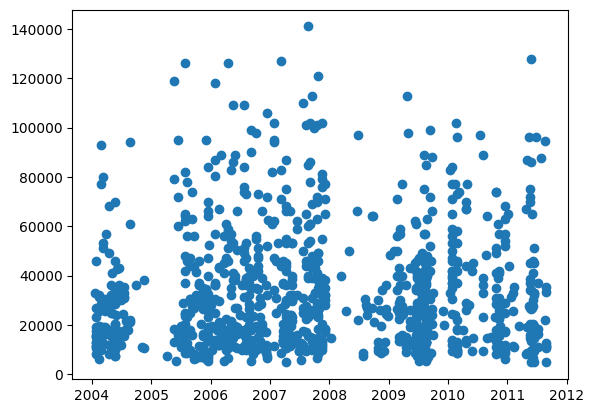

In [159]:
fig,ax=plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000])
plt.show()


## Sorting Data by Date Time

In [160]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
31494,1263797,17000,1526902,6953,132,99,1983,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
53101,1298915,49000,1338785,4124,132,99,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
92833,1404057,34000,1394594,7110,132,99,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67034,1340383,110000,1311130,3406,132,99,1987,NaN,NaN,1989-01-31,...,30 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
66337,1338469,50000,1505032,23944,132,99,1984,NaN,NaN,1989-01-31,...,28 inch,None or Unspecified,None or Unspecified,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN


## Feature Enginering

In [161]:
df['saleYear']=df.saledate.dt.year
df['saleMonth']=df.saledate.dt.month
df['saleDay']=df.saledate.dt.day
df['saleDayOfWeek']=df.saledate.dt.dayofweek
df['saleDayOfYear']=df.saledate.dt.dayofyear

In [162]:
df=df.drop('saledate',axis=1)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
31494,1263797,17000,1526902,6953,132,99,1983,NaN,NaN,W20,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
53101,1298915,49000,1338785,4124,132,99,1984,NaN,NaN,D6D,...,None or Unspecified,Angle,None or Unspecified,NaN,NaN,1989,1,31,1,31
92833,1404057,34000,1394594,7110,132,99,1987,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
67034,1340383,110000,1311130,3406,132,99,1987,NaN,NaN,225B,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
66337,1338469,50000,1505032,23944,132,99,1984,NaN,NaN,215B,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


In [163]:
df.state.value_counts()

,count
state,
Florida,17839
Texas,16419
California,8306
Georgia,4346
Washington,4269
Pennsylvania,4122
Mississippi,4066
Ohio,3904
Illinois,3645


## Converting Strings to Category
    ** You have to find columns that have strings**

In [164]:
# for labels, columns in df.items():
#     if pd.api.types.is_string_dtype(columns):
#         print(labels)


In [165]:
# for labels, columns in df.items():
#     if pd.api.types.is_string_dtype(columns):
#         df[labels]=columns.astype('category').cat.as_ordered()
#         df[labels]=pd.Categorical(columns,ordered=True).codes+1
#         print(labels)

In [166]:
string_columns = df.select_dtypes(include=['object']).columns
print(string_columns)


Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')


In [167]:
# Select the columns
columns_to_convert = [
    'UsageBand', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
    'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
    'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
    'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
    'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
    'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
    'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
    'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
    'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
    'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
    'Differential_Type', 'Steering_Controls'
]

# Convert the selected columns to 'category' data type
df[columns_to_convert] = df[columns_to_convert].astype('category')


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126919 entries, 31494 to 23970
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   126919 non-null  int64   
 1   SalePrice                 126919 non-null  int64   
 2   MachineID                 126919 non-null  int64   
 3   ModelID                   126919 non-null  int64   
 4   datasource                126919 non-null  int64   
 5   auctioneerID              126919 non-null  int64   
 6   YearMade                  126919 non-null  int64   
 7   MachineHoursCurrentMeter  26735 non-null   float64 
 8   UsageBand                 23809 non-null   category
 9   fiModelDesc               126919 non-null  object  
 10  fiBaseModel               126919 non-null  object  
 11  fiSecondaryDesc           90484 non-null   category
 12  fiModelSeries             9986 non-null    category
 13  fiModelDescriptor         20056

In [169]:
(df.isna().sum()/len(df))*100

,0
SalesID,0.000000
SalePrice,0.000000
MachineID,0.000000
ModelID,0.000000
datasource,0.000000
auctioneerID,0.000000
YearMade,0.000000
MachineHoursCurrentMeter,78.935384
UsageBand,81.240791
fiModelDesc,0.000000


## Filling missng Values

In [170]:
df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,100184
UsageBand,103110
fiModelDesc,0


## Filling null numerical data


In [171]:
for label, column in df.items():
  if pd.api.types.is_numeric_dtype(column):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [172]:
for label, column in df.items():
  if pd.api.types.is_numeric_dtype(column):
    if pd.isnull(column).sum():
      print(label)

MachineHoursCurrentMeter


In [173]:
for label, column in df.items():
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(column):
        # Calculate the percentage of missing values
        missing_percentage = pd.isnull(column).sum() / len(column) * 100

        # If more than 50% of the values are missing, drop the column
        if missing_percentage > 50:
            df.drop(label, axis=1, inplace=True)
        else:
            # Create a new column indicating missing values
            if pd.isnull(column).sum():
                df[label + '_is_missing'] = pd.isnull(column) * 1
                # Fill missing values with the median of the column
                df[label] = column.fillna(column.median())


## Filling Null Categorical columns

In [174]:
for rows,column in df.items():
  if not pd.api.types.is_numeric_dtype(column):
    if pd.isnull(column).sum():
      print(rows)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [175]:
for label, column in df.items():
    # Check if the column is not numeric
    if not pd.api.types.is_numeric_dtype(column):
        # Calculate the percentage of missing values
        missing_percentage = pd.isnull(column).sum() / len(column) * 100

        # If more than 50% of the values are missing, drop the column
        if missing_percentage > 50:
            df.drop(label, axis=1, inplace=True)
        else:
            # If the column has missing values
            if pd.isnull(column).sum():
                # Create a new column indicating missing values
                df[label + '_is_missing'] = pd.isnull(column) * 1
                # Fill missing values with the mode (most frequent value)
                df[label] = column.fillna(column.mode()[0])
                print(label)


fiSecondaryDesc
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Enclosure
Transmission
Hydraulics


In [176]:
df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
fiModelDesc,0
fiBaseModel,0
fiSecondaryDesc,0


## Splitting the Data

In [177]:
df_copy=df

In [178]:
df_copy=pd.get_dummies(data=df_copy,drop_first=True)
target=df_copy.SalePrice
features=df_copy.drop('SalePrice',axis=1)

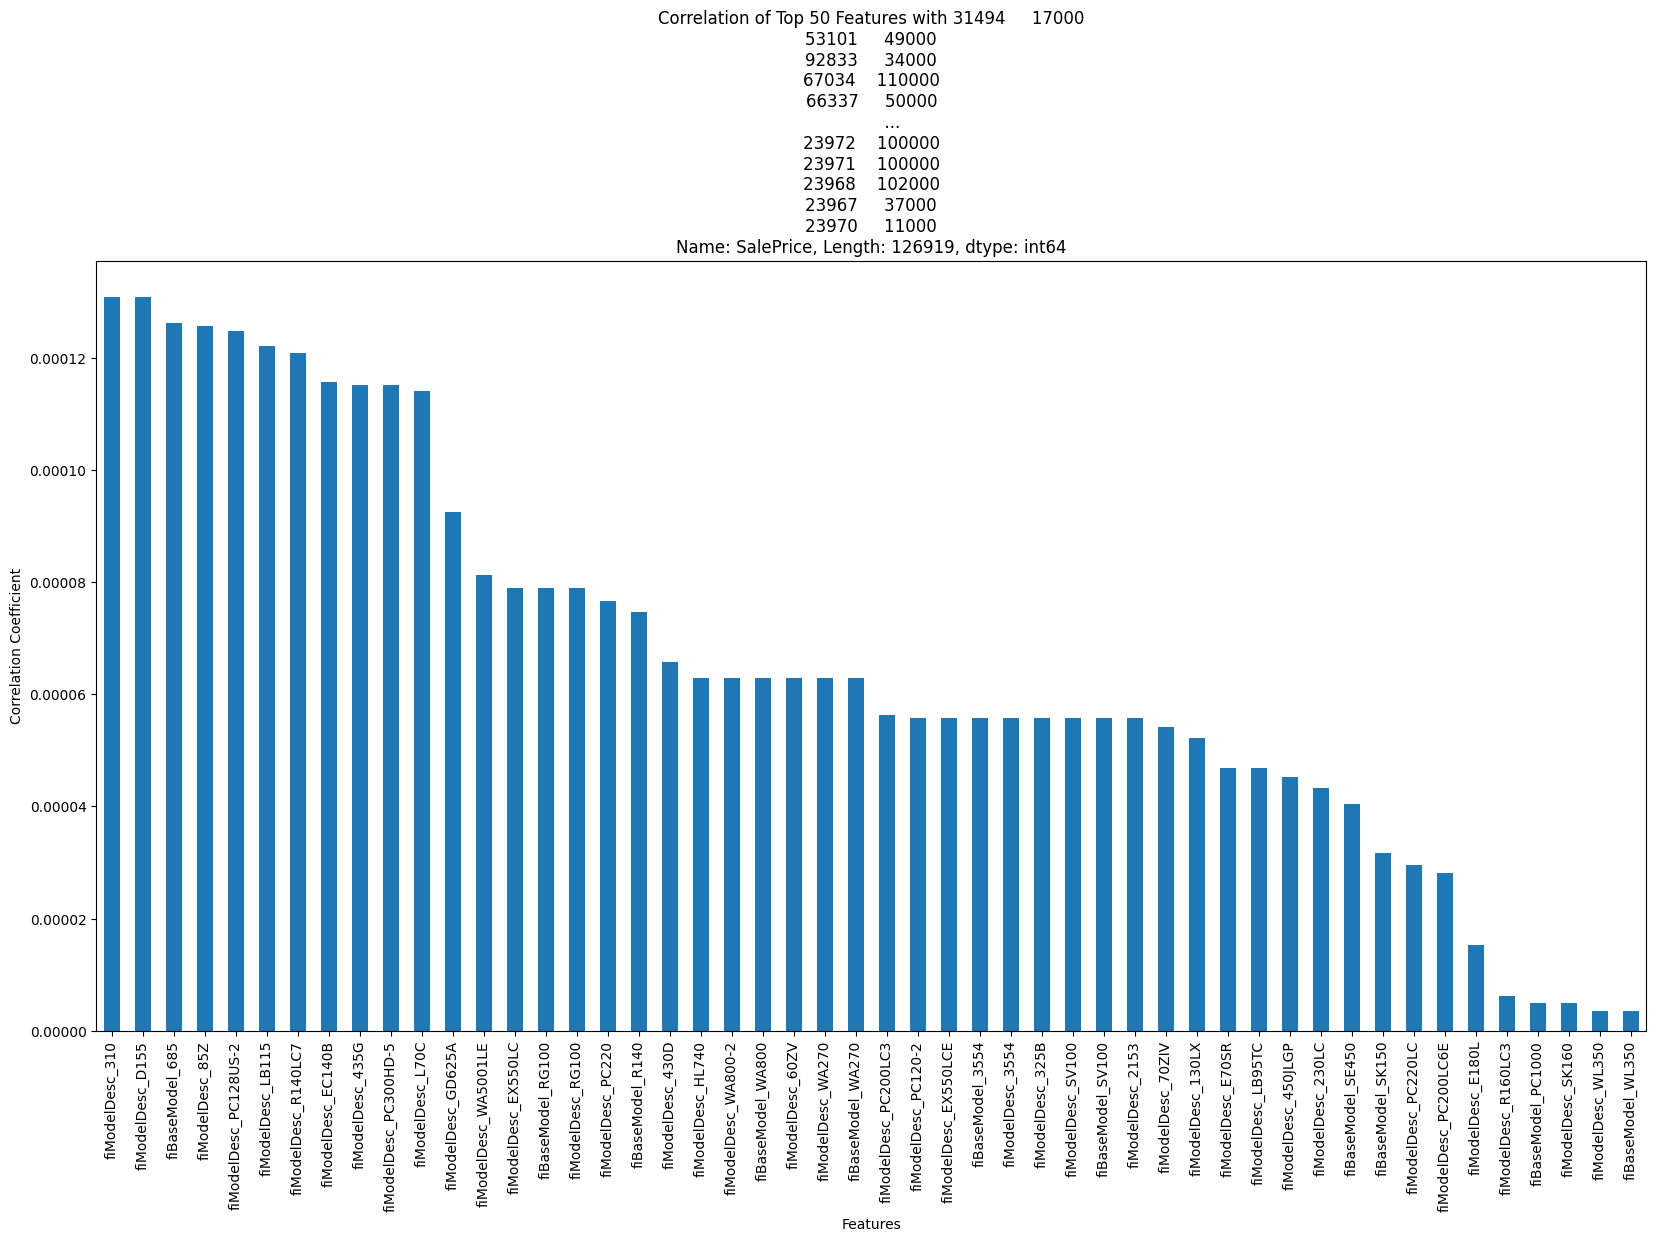

In [179]:
import matplotlib.pyplot as plt

# Calculate correlation with the target
correlations = features.corrwith(target)

# Sort correlations by absolute value to see the strongest correlations first
correlations = correlations.abs().sort_values(ascending=False)

# Select the top 50 correlations
top_50_correlations = correlations.tail(50)

# Plot the bar graph
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
top_50_correlations.plot(kind='bar')
plt.title(f'Correlation of Top 50 Features with {target}')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


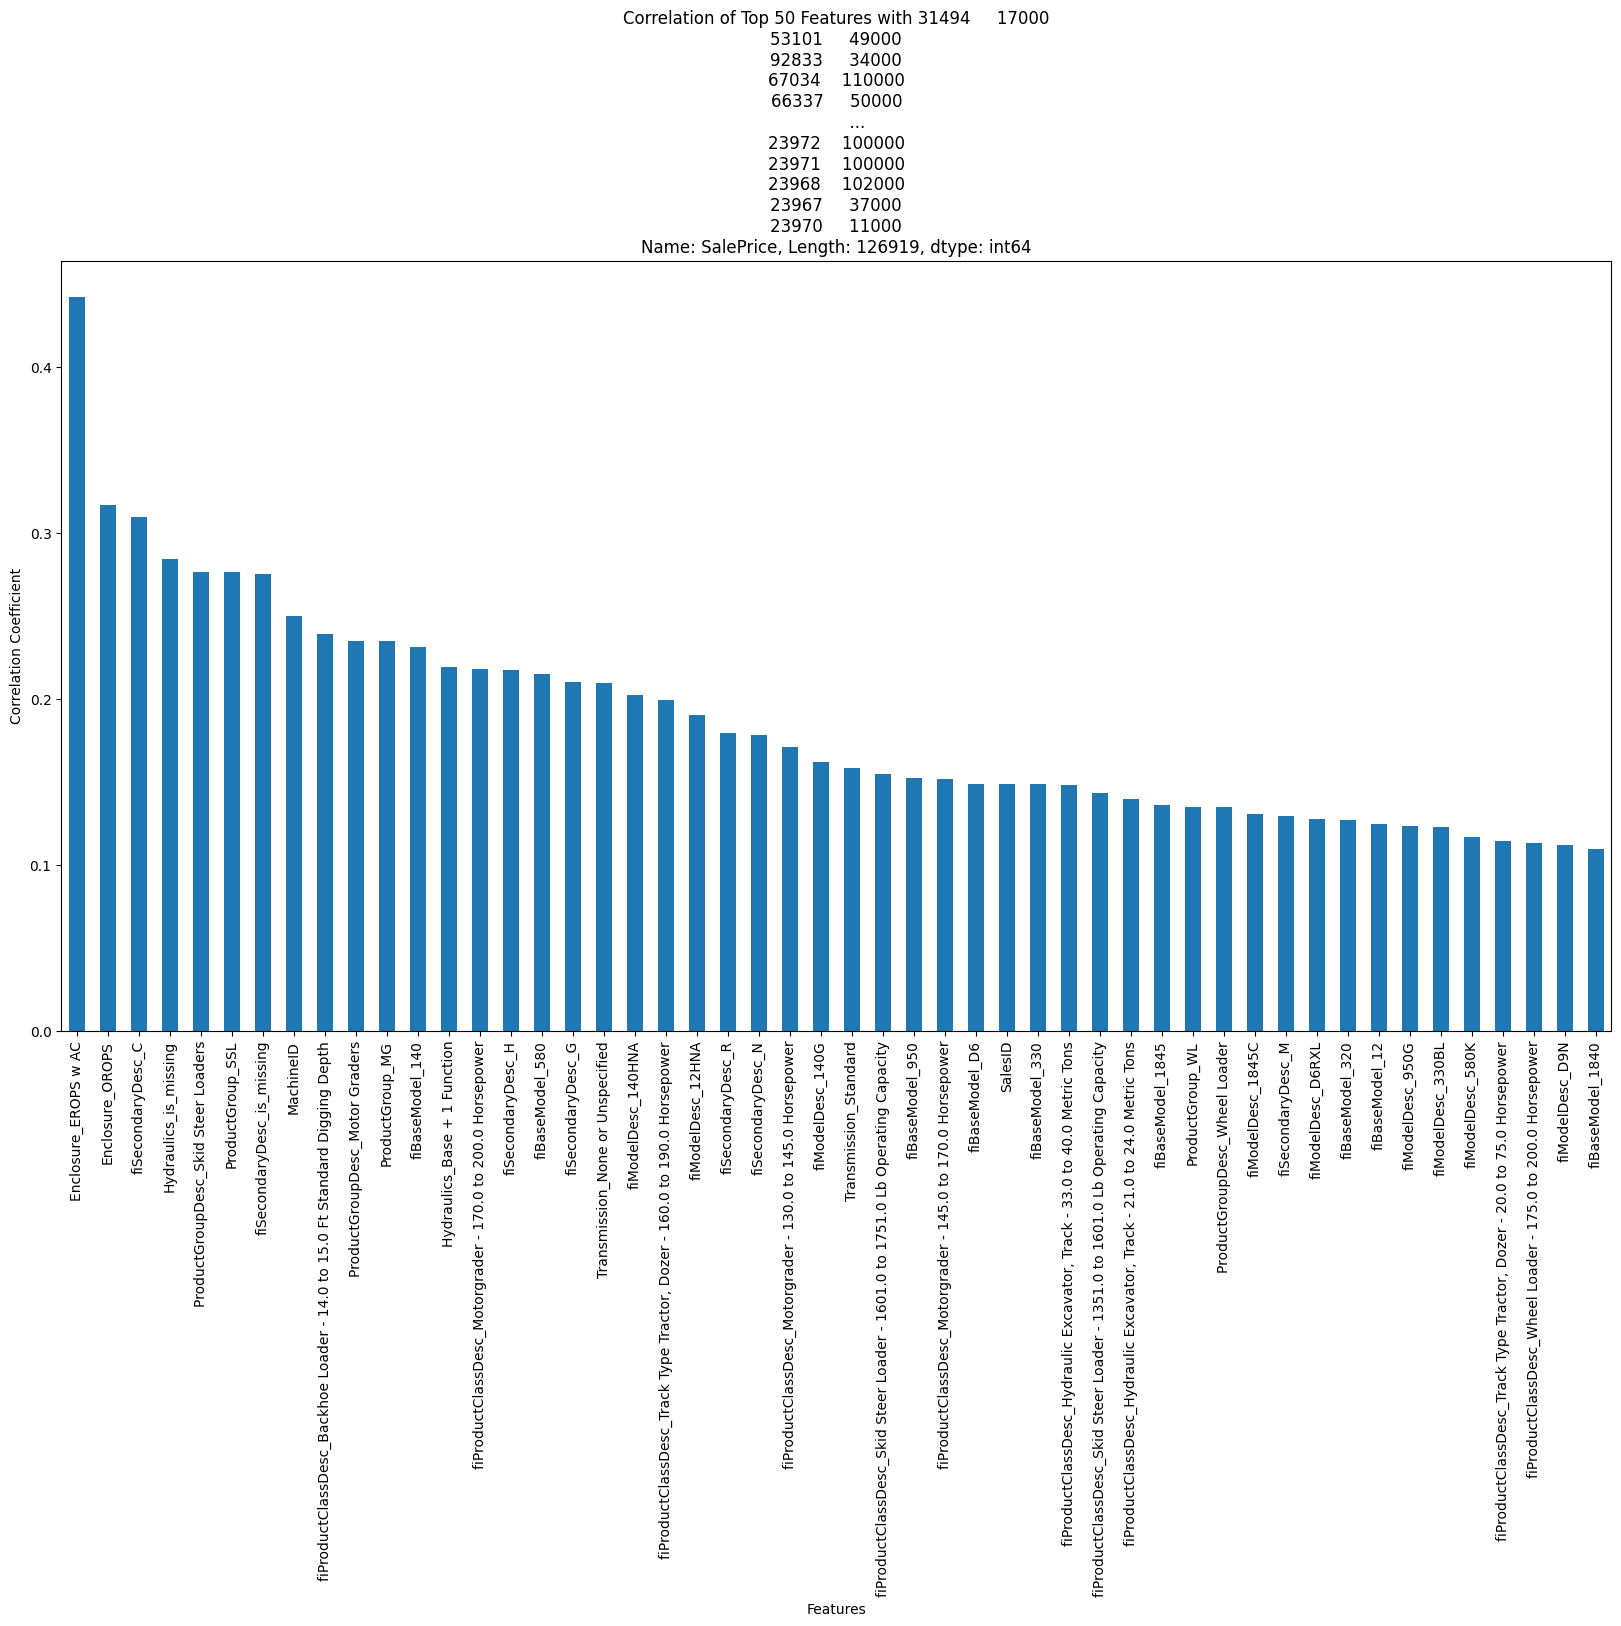

In [180]:
import matplotlib.pyplot as plt

# Calculate correlation with the target
correlations = features.corrwith(target)

# Sort correlations by absolute value to see the strongest correlations first
correlations = correlations.abs().sort_values(ascending=False)

# Select the top 50 correlations
top_50_correlations = correlations.head(50)

# Plot the bar graph
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
top_50_correlations.plot(kind='bar')
plt.title(f'Correlation of Top 50 Features with {target}')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


## Spliting the Dataset

In [181]:
df=pd.get_dummies(data=df,drop_first=True)
x=df.drop('SalePrice',axis=1)
y=df.SalePrice
X_70,x_30,Y_70,y_30=train_test_split(x,y,test_size=0.4,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(x_30,
                                               y_30,
                                               test_size=0.2,
                                               random_state=42)


## Model 1: Random Forest

In [182]:
model=RandomForestRegressor(n_estimators=100,
                            random_state=42,
                            n_jobs=-1,
                            )
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


## Evaluation Function

In [183]:
def evaluate_model(model,y_test, y_pred):
  metrics={
      'R2 Score': r2_score(y_test, y_pred),
      'Mean Squared Error': mean_squared_error(y_test, y_pred),
      'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
      'Root Mean Squared Error': np.sqrt(mean_squared_error(y_test, y_pred)),
      'Mean Squared Log Error': mean_squared_log_error(y_test, y_pred),
      'Root Mean Squared Log Error': np.sqrt(mean_squared_log_error(y_test, y_pred))

  }
  return metrics


In [184]:
evaluate_model(model,y_test,y_pred)

{'R2 Score': 0.8800285549433836,
 'Mean Squared Error': 66741507.33526456,
 'Mean Absolute Error': 5160.579694701596,
 'Root Mean Squared Error': 8169.547560009953,
 'Mean Squared Log Error': 0.051401999876822355,
 'Root Mean Squared Log Error': 0.22672009147144934}

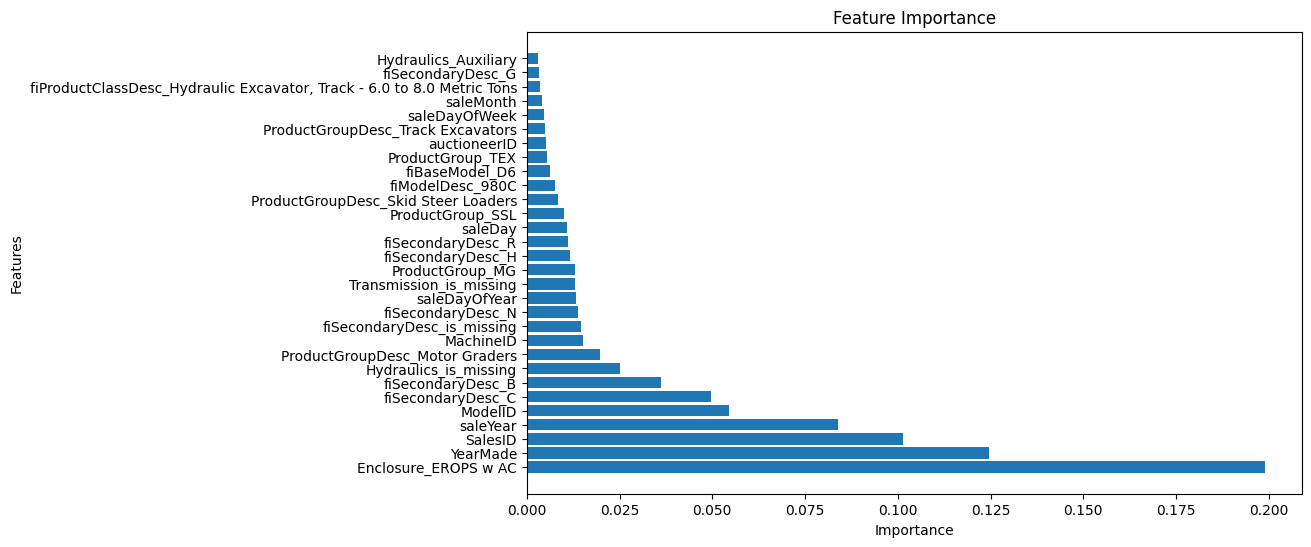

,columns,importances
0,Enclosure_EROPS w AC,0.198945
1,YearMade,0.124467
2,SalesID,0.101400
3,saleYear,0.083988
4,ModelID,0.054580
...,...,...
3914,fiModelDesc_PC230LC6,0.000000
3915,fiModelDesc_PC228UU-1,0.000000
3916,fiModelDesc_PC228USLC1,0.000000
3917,fiModelDesc_PC228,0.000000


In [186]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importances(columns, importances, n=30):
    df = pd.DataFrame({
        'columns': columns,
        'importances': importances
    })
    df = df.sort_values('importances', ascending=False).reset_index(drop=True)

    plt.figure(figsize=(10, 6))
    plt.barh(df['columns'][:n], df['importances'][:n])
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

    return df

# Example usage
plot_feature_importances(X_train.columns, model.feature_importances_)


## Model 2: XGboost

In [187]:
model_2=xgb.XGBRFRegressor()
model_2.fit(X_train,y_train)
y_pred_2=model_2.predict(X_test)

In [188]:
evaluate_model(model_2,y_test,y_pred_2)

{'R2 Score': 0.6355487060302181,
 'Mean Squared Error': 202748484.84447253,
 'Mean Absolute Error': 9674.303628323043,
 'Root Mean Squared Error': 14238.977661492152,
 'Mean Squared Log Error': 0.15348142102404838,
 'Root Mean Squared Log Error': 0.39176704943633067}